In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass

In [3]:
first = pd.read_csv("/home/robbe/ionbot/mastersets/master_first.csv")


/tmp/ipykernel_2223886/3209541947.py:1: DtypeWarning: Columns (23,25,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  first = pd.read_csv("/home/robbe/ionbot/mastersets/master_first.csv")


In [4]:
#Masterset still included the data from PXD006657, but this won't be used because of labelling
first = first[first["Accession"] != 6657]


In [5]:
print("The amount of PSMs in the master dataset is: ", first.shape[0])

The amount of PSMs in the master dataset is:  1377166


In [6]:
lower = pd.read_csv("/home/robbe/ionbot/mastersets/master_lower.csv")
lower = lower[lower["Accession"] != 6657]

/tmp/ipykernel_2223886/484445909.py:1: DtypeWarning: Columns (27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  lower = pd.read_csv("/home/robbe/ionbot/mastersets/master_lower.csv")


In [7]:
lower.head()

,Unnamed: 0,ionbot_match_id,spectrum_title,scan,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,...,Organism,Cell line,Oxidant treatment,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting
883,0,0_7259_5,controllerType=0 controllerNumber=1 scan=10278,10278,QX01860,974.54635,9745.4365,2128.42602,2,IPIQDVYK,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,Lower
884,1,0_7323_1,controllerType=0 controllerNumber=1 scan=10357,10357,QX01860,1298.59324,12966.4959,2138.88984,2,NIVISGGSTMFR,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,Lower
885,2,0_7323_3,controllerType=0 controllerNumber=1 scan=10357,10357,QX01860,1298.59324,12966.0984,2138.88984,2,NEPNSYAISFR,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,Lower
886,3,0_7356_2,controllerType=0 controllerNumber=1 scan=10400,10400,QX01860,967.44120,9664.9231,2145.03438,2,VPQFSFSR,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,Lower
887,4,0_7406_2,controllerType=0 controllerNumber=1 scan=10464,10464,QX01860,1259.59495,12606.4958,2153.91696,2,MGIIQTADQIR,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,Lower


In [8]:
print("The amount of lower-ranked PSMs in the master dataset is: ", lower.shape[0])

The amount of lower-ranked PSMs in the master dataset is:  42265


In [9]:
first_proteins = pd.read_csv("/home/robbe/ionbot/mastersets/master_first_proteins.csv")
first_proteins = first_proteins[first_proteins["Accession"] != 6657]

/tmp/ipykernel_2223886/484727451.py:1: DtypeWarning: Columns (15,17,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  first_proteins = pd.read_csv("/home/robbe/ionbot/mastersets/master_first_proteins.csv")


In [10]:
first_proteins.head()

,Unnamed: 0,ionbot_match_id,is_shared_peptide,protein_group,protein_group_q-value,protein_group_PEP,protein,position_in_protein,uniprot_id,protein_length,...,Organism,Cell line,Oxidant treatment,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting
98437,0,0_7047_1,False,K2C1_HUMAN,0.002,1.251310e-02,K2C1_HUMAN,258-268,P04264,644.0,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,First
98438,1,0_7049_2,True,K1C14_HUMAN__sp|P02533__|sp|P02533,0.001,2.296970e-07,K1C14_HUMAN,316-329,P02533,472.0,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,First
98439,2,0_7049_2,True,K1C17_HUMAN,0.001,4.020600e-06,K1C17_HUMAN,285-298,Q04695,432.0,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,First
98440,3,0_7049_2,True,K1C14_HUMAN__sp|P02533__|sp|P02533,0.001,2.296970e-07,sp|P02533,316-329,sp|P02533,472.0,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,First
98441,4,0_7051_1,False,RL18A_HUMAN,0.002,1.252530e-02,RL18A_HUMAN,99-112,Q02543,176.0,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,First


In [11]:
print("The amount of first-ranked proteins in the master dataset is:", first_proteins.shape[0])
print("This includes duplicates found in multiple files")

The amount of first-ranked proteins in the master dataset is: 1560675
This includes duplicates found in multiple files


In [12]:
first_proteins01 = first_proteins[first_proteins["protein_group_q-value"] < 0.01]

In [13]:
print("The amount of first-ranked proteins with a q-value on the protein level below 0.01 found in the master dataset is: ", first_proteins01.shape[0])
print("This includes duplicates found in multiple files")


The amount of first-ranked proteins with a q-value on the protein level below 0.01 found in the master dataset is:  1441437
This includes duplicates found in multiple files


In [14]:
coeluting_proteins = pd.read_csv("/home/robbe/ionbot/mastersets/master_coeluting_proteins.csv")
coeluting_proteins = coeluting_proteins[coeluting_proteins["Accession"] != 6657]

/tmp/ipykernel_2223886/2368347527.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  coeluting_proteins = pd.read_csv("/home/robbe/ionbot/mastersets/master_coeluting_proteins.csv")


In [15]:
print("The amount of coeluting proteins in the master dataset is: ", coeluting_proteins.shape[0])
print("This includes duplicates found in multiple files")

The amount of coeluting proteins in the master dataset is:  1766859
This includes duplicates found in multiple files


In [16]:
coeluting_proteins01 = coeluting_proteins[coeluting_proteins["protein_group_q-value"] < 0.01]

In [17]:
print("The amount of coeluting proteins with a q-value on the protein level below 0.01 found in the master dataset is: ", coeluting_proteins01.shape[0])
print("This includes duplicates found in multiple files")

The amount of coeluting proteins with a q-value on the protein level below 0.01 found in the master dataset is:  1619532
This includes duplicates found in multiple files


In [18]:
#Amount of PSMs found in each PXD project
PSMcounts = first.groupby("Accession")["scan"].count().to_frame().reset_index()
PSMcounts

,Accession,scan
0,14381,165237
1,15122,470745
2,18549,303227
3,19823,262098
4,22545,110369
5,30782,65490


Text(0.5, 0, 'Pride Project')

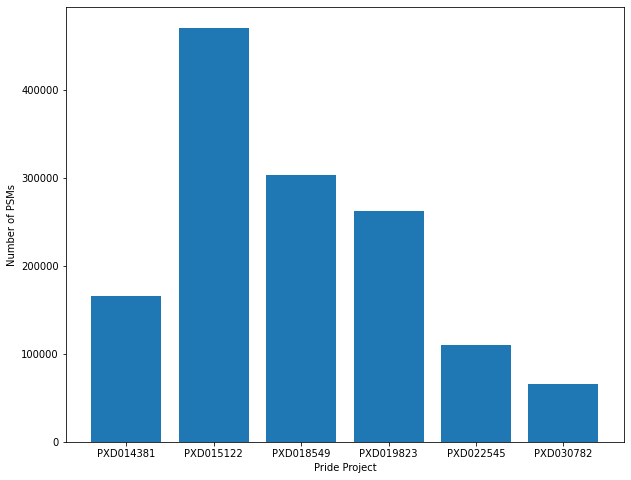

In [19]:
Accessionnames = ["PXD" + str(x).zfill(6) for x in PSMcounts["Accession"]]
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)
plt.bar(x=Accessionnames, height=PSMcounts["scan"])
plt.ylabel("Number of PSMs")
plt.xlabel("Pride Project")

In [20]:
print("The amount of raw files that make up the master dataset is: ", len(first["spectrum_file"].unique()))

The amount of raw files that make up the master dataset is:  136


In [21]:
first.columns

Index(['Unnamed: 0', 'ionbot_match_id', 'spectrum_title', 'scan',
       'spectrum_file', 'precursor_mass', 'peptide_mass',
       'observed_retention_time', 'charge', 'database_peptide',
       'matched_peptide', 'modifications', 'modifications_delta',
       'corrected_retention_time', 'unexpected_modification', 'database',
       'psm_score', 'q-value', 'PEP', 'proteins', 'Accession', 'Organism',
       'Cell line', 'Oxidant treatment', 'Oxidant dose (µM)',
       'Secondary treatment', 'Secondary treatment dose (µM)',
       'Length of oxidant treatment (mins)',
       'Length of Secondary treatment (mins)', 'Notes',
       'First/Lower/Coeluting'],
      dtype='object')

In [22]:
first['modifications'] = first['modifications'].fillna("None")

In [23]:
#Overview of all the treatments and the amount of PSMs they have
gtreat = first.groupby(["Oxidant treatment", "Oxidant dose (µM)", "Length of oxidant treatment (mins)", "Secondary treatment", "Secondary treatment dose (µM)", 'Length of Secondary treatment (mins)'])["scan"].count().to_frame().reset_index()
gtreat.to_csv("Conditionlist.csv")
gtreat

,Oxidant treatment,Oxidant dose (µM),Length of oxidant treatment (mins),Secondary treatment,Secondary treatment dose (µM),Length of Secondary treatment (mins),scan
0,CPT,0.1,4320,None,0.00,0,104781
1,Constitutively active AKT,0.0,0,Galactose,0.00,Long-term,41902
2,Constitutively active AKT,0.0,0,Galactose,0.00,Short-term,65538
3,Constitutively active AKT,0.0,0,None,0.00,0,37524
4,Constitutively active MYC,0.0,0,Galactose,0.00,Long-term,59213
5,Constitutively active MYC,0.0,0,Galactose,0.00,Short-term,37992
6,Constitutively active MYC,0.0,0,None,0.00,0,32768
7,Constitutively active MYC,0.0,0,None,0.00,0,39852
8,Diamide,500.0,15,None,0.00,0,74579
9,Diamide,500.0,15,None,0.00,0,56


## Some explanation on the different treatments.
There are 31 different treatments, based on their oxidant (dose), secondary treatment (dose) and the extents thereof.
1. **CPT** (camptothecin) is a pesticide that targets the Topoisomerase I system. "Oxidative stress resulted from excessive production of reactive oxygen species (ROS) has been proved to be an important component of the mechanism of pesticide toxicity." [Source](https://pubmed.ncbi.nlm.nih.gov/30414480/)
2. **TPT** (topotecan) is a CPT derivative that is less toxic and is used in common cancer treatment regimes. It also targets the Topoisomerase I system. [Source](https://pubmed.ncbi.nlm.nih.gov/16273129/)
Both these oxidants were used with a dose of 0.1 µM for 4320 minutes.
3. **AKT** and **MYC** are both oncogenes. [Source](https://journals.biologists.com/jcs/article/133/7/jcs239277/224851/AKT-but-not-MYC-promotes-reactive-oxygen-species) found that cells constitutively expressing AKT died of oxidative stress when cultured in galactose (oxidative culture, relying on oxidative phosphorylation rather than glycolysis). This was not the case for cells constitutively expressing MYC.
4. **Diamide** is an oxidant that oxidizes thiols to form S-glutathionylations. It was used at a dose of 500 µM for 15 mins.
5. **H2O2** is a product of oxygen metabolism in cells. The elevation of H2O2 levels inside the cell is classified as oxidative stress.
In the master dataset, several doses and treatment lengths of H2O2 are found, often together with a secondary treatment:
- In combination with a hybrid protein stably expressed in the cytosol (c-YAP) which traps protein sulfenic acids for enrichment of sulfenylated proteins in these samples (so this means that from these raw files, only sulfenylated proteins are included): 10, 30, 100, 300, 1000µM for 10 mins.
- In combination with a hybrid protein stably expressed in the mitochondria (mt-YAP) which traps protein sulfenic acids for enrichment of sulfenylated proteins in these samples (so this means that from these raw files, only sulfenylated proteins are included): 1000µM for 10 mins
- In combination with a hybrid protein stably expressed in the peroxisome (po-YAP) which traps protein sulfenic acids for enrichment of sulfenylated proteins in these samples (so this means that from these raw files, only sulfenylated proteins are included): 1000µM for 10 mins
- In combination with NAD+, a donor of ADP-ribose units used by PARP-1 to attach to target proteins. Overactivation of PARP-1 due to oxidative stress can lead to NAD+ depletion, which can lead to cell death: 3500 µM for 30 mins
- Without a secondary treatment: 3500 µM for 30 mins
- In combination with PARP-1 targeting siRNA: 3500 µM for 30 mins
- In combination with PJ34, a PARP-1 inhibitor: 3500 µM for 30 mins
6. **Retinoic acid** stimulation has shown altering expression of subunits of the NOX complex, which is the main source of intracellular ROS, as well as altering amounts of cytoplasmic H2O2 and antioxidant enzymes [Source](https://portlandpress.com/biochemj/article/477/23/4491/226892/PARP-1-activation-after-oxidative-insult-promotes). It was used in a dose of 10 µM for 120 minutes. 

Of course, control condition without oxidant treatment are also included.






In [24]:
#Spectral count of each peptidoform?
spectrum_counts = first.groupby(["matched_peptide", "modifications", "spectrum_file"])['scan'].count().to_frame().reset_index()
spectrum_counts

,matched_peptide,modifications,spectrum_file,scan
0,AAAAAAAAAAAAAAAASAGGK,x|[4]Carbamidomethyl[H],QE1_Sandra_PP_Sample01_R,1
1,AAAAAAAAAAAAAAAGAGAGAK,0|[4]Carbamidomethyl[N-TERM],qe1_2019oct05_07_uc190822_dw35_1a,1
2,AAAAAAAAAAAAAAAGAGAGAK,0|[58]Propionyl[N-TERM],qe1_2019oct05_07_uc190822_dw35_1a,1
3,AAAAAAAAAAAAAAAGAGAGAK,23|[30]Cation:Na[C-TERM],qe1_2019oct05_07_uc190822_dw35_1a,1
4,AAAAAAAAAAAAAAAGAGAGAK,23|[30]Cation:Na[C-TERM],qe1_2019oct05_11_uc190822_dw35_2a,1
...,...,...,...,...
982753,YYYAVYDMVVR,9|[35]Oxidation[V],qe1_2019oct05_19_uc190822_dw35_4a,1
982754,YYYQGCASWK,6|[4]carbamidomethyl[C],QX01865,1
982755,YYYQGCASWK,6|[4]carbamidomethyl[C],QX01874,1
982756,YYYQGCASWK,6|[4]carbamidomethyl[C],QX01984,1


In [25]:
db = pymass.Unimod()
modslist = []
for p in range(len(db.mods)):
    for pp in db.mods[p]['specificity']:
        if db.mods[p]['record_id'] in [35, 53, 129, 130, 205, 206, 275, 288, 318, 319, 335, 340, 342, 344, 345, 348, 349, 350, 351, 352, 354, 
        359, 360, 368, 378, 392, 401, 421, 425, 534, 540, 548, 569, 720, 721, 743, 743, 860, 936, 936, 937, 949, 1384, 1914, 1915, 1916, 1917, 1918, 
        1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929]:
            t = db.mods[p]['title']
            t = t.replace("[",":").replace("]",":")
            string = "[" + str(db.mods[p]['record_id']) + "]" + t + "[" + pp['site'] + "]"
            modslist.append(string)
modslist.append('[35]oxidation[M]')


In [26]:
from cmath import nan


def get_positions(str):
    if str != "":
        lijst = str.split("|")
        return lijst[0::2]
def get_modification(str):
    lijst = str.split("|")
    if len(lijst) <= 1:
        return nan
    else:
        return lijst[1::2]
def oxidatively_modified(str):
    for mod in modslist:
        if mod in str:
            return True
        else:
            continue
    return False



    

In [27]:
first.head()

,Unnamed: 0,ionbot_match_id,spectrum_title,scan,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,...,Organism,Cell line,Oxidant treatment,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting
96963,0.0,0_7047_1,controllerType=0 controllerNumber=1 scan=10000,10000,QX01860,1299.52295,12995.2233,2088.93726,2,NMQDMVEDYR,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,First
96964,1.0,0_7049_2,controllerType=0 controllerNumber=1 scan=10002,10002,QX01860,1342.68076,13606.8340,2089.11678,2,EVATNSEIVQSGK,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,First
96965,2.0,0_7051_1,controllerType=0 controllerNumber=1 scan=10004,10004,QX01860,1455.68931,14546.8234,2089.29816,2,DITTAGAVTQCYR,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,First
96966,3.0,0_7059_6,controllerType=0 controllerNumber=1 scan=10018,10018,QX01860,1085.55539,10836.2877,2091.89886,2,IITPAVVSER,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,First
96967,4.0,0_7065_4,controllerType=0 controllerNumber=1 scan=10026,10026,QX01860,1072.61240,10726.1280,2093.03598,2,VTIAVSDIQK,...,Human,SH-SY5Y,Retinoic acid,10.0,None,0.0,120,0,NaN,First


In [28]:
first['position'] = first['modifications'].apply(get_positions)
first['Modification'] = first['modifications'].apply(get_modification)
first["Oxidatively_modified"] = first["modifications"].apply(oxidatively_modified)

firstexp = first.explode("Modification")




In [29]:
oxfirst = firstexp[firstexp["Oxidatively_modified"] == True]

In [30]:
#Exploded list of peptides that are oxidatively modified (non-oxmods are still included, but these peptides also have an oxmod)
oxfirst

,Unnamed: 0,ionbot_match_id,spectrum_title,scan,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,...,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,position,Modification,Oxidatively_modified
96971,8.0,0_7084_1,controllerType=0 controllerNumber=1 scan=10051,10051,QX01860,1315.51560,13155.1724,2096.60232,2,NMQDMVEDYR,...,10.0,None,0.0,120,0,NaN,First,[2],[35]oxidation[M],True
96977,14.0,0_7117_2,controllerType=0 controllerNumber=1 scan=10092,10092,QX01860,1424.64316,14236.4014,2101.99158,2,NVEAMNFADIER,...,10.0,None,0.0,120,0,NaN,First,[5],[35]oxidation[M],True
96985,22.0,0_7156_3,controllerType=0 controllerNumber=1 scan=10145,10145,QX01860,1112.47593,11084.8253,2109.79938,2,DAEAWFNEK,...,10.0,None,0.0,120,0,NaN,First,[5],[351]Trp->Kynurenin[W],True
96993,30.0,0_7190_2,controllerType=0 controllerNumber=1 scan=10189,10189,QX01860,1169.49875,11375.0905,2115.96798,2,YEWDVAEAR,...,10.0,None,0.0,120,0,NaN,First,[1],[425]Dioxidation[Y],True
97003,40.0,0_7222_1,controllerType=0 controllerNumber=1 scan=10230,10230,QX01860,1253.55991,11965.3831,2121.65280,2,GMQDIVEDFK,...,10.0,None,0.0,120,0,NaN,First,"[2, 0]",[35]oxidation[M],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474070,7076.0,0_7804_2,controllerType=0 controllerNumber=1 scan=9925,9925,Experiment 4_extH2O2_c-YAP_concentration curve...,2323.13155,23221.2734,2045.12292,3,IQYQIVDISQDNAIRDEMR,...,30.0,c-YAP,0.0,10,0,YAP1C can react with and trap protein sulfenic...,First,[18],[35]oxidation[M],True
1474088,7094.0,0_7825_2,controllerType=0 controllerNumber=1 scan=9948,9948,Experiment 4_extH2O2_c-YAP_concentration curve...,2226.00052,22260.0111,2048.96664,3,AMISGPGQFAENETNEVNFR,...,30.0,c-YAP,0.0,10,0,YAP1C can react with and trap protein sulfenic...,First,[2],[35]oxidation[M],True
1474112,7118.0,0_7852_2,controllerType=0 controllerNumber=1 scan=9979,9979,Experiment 4_extH2O2_c-YAP_concentration curve...,1326.64048,13306.2607,2054.33922,2,PMEINPEMINK,...,30.0,c-YAP,0.0,10,0,YAP1C can react with and trap protein sulfenic...,First,[2],[35]oxidation[M],True
1474119,7125.0,0_7859_1,controllerType=0 controllerNumber=1 scan=9987,9987,Experiment 4_extH2O2_c-YAP_concentration curve...,1977.89422,19739.0066,2055.71544,3,IEWIESHQDADIEDFK,...,30.0,c-YAP,0.0,10,0,YAP1C can react with and trap protein sulfenic...,First,[3],[351]Trp->Kynurenin[W],True


In [31]:
#Same but here only oxmods included
oxPSMs = oxfirst[oxfirst['Modification'].isin(modslist)]

In [32]:
oxPSMs.head()

,Unnamed: 0,ionbot_match_id,spectrum_title,scan,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,...,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,position,Modification,Oxidatively_modified
96971,8.0,0_7084_1,controllerType=0 controllerNumber=1 scan=10051,10051,QX01860,1315.51560,13155.1724,2096.60232,2,NMQDMVEDYR,...,10.0,None,0.0,120,0,NaN,First,[2],[35]oxidation[M],True
96977,14.0,0_7117_2,controllerType=0 controllerNumber=1 scan=10092,10092,QX01860,1424.64316,14236.4014,2101.99158,2,NVEAMNFADIER,...,10.0,None,0.0,120,0,NaN,First,[5],[35]oxidation[M],True
96985,22.0,0_7156_3,controllerType=0 controllerNumber=1 scan=10145,10145,QX01860,1112.47593,11084.8253,2109.79938,2,DAEAWFNEK,...,10.0,None,0.0,120,0,NaN,First,[5],[351]Trp->Kynurenin[W],True
96993,30.0,0_7190_2,controllerType=0 controllerNumber=1 scan=10189,10189,QX01860,1169.49875,11375.0905,2115.96798,2,YEWDVAEAR,...,10.0,None,0.0,120,0,NaN,First,[1],[425]Dioxidation[Y],True
97003,40.0,0_7222_1,controllerType=0 controllerNumber=1 scan=10230,10230,QX01860,1253.55991,11965.3831,2121.65280,2,GMQDIVEDFK,...,10.0,None,0.0,120,0,NaN,First,"[2, 0]",[35]oxidation[M],True


In [33]:
print("The amount of PSMs with oxidative modifications in the master dataset is: ", oxPSMs.shape[0])

The amount of PSMs with oxidative modifications in the master dataset is:  135277


In [34]:
modcounts = oxPSMs.groupby("Modification")["scan"].count().to_frame().reset_index().sort_values("scan")
modcounts

,Modification,scan
40,[340]Bromo[W],1
2,[130]Diiodo[H],1
109,[743]4-ONE+Delta:H(-2)O(-1)[K],2
37,[335]HNE+Delta:H(2)[K],3
18,[1923]Delta:H(-4)O(2)[W],3
...,...,...
91,[425]Dioxidation[M],1164
86,[425]Dioxidation[C],1226
83,[421]Sulfide[C],1754
44,[345]Trioxidation[C],2058


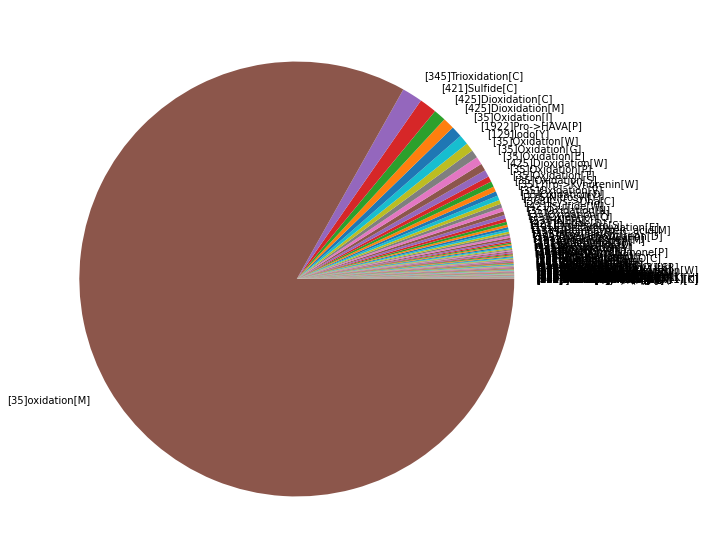

In [35]:
fig = plt.figure()
plt.pie(x = modcounts["scan"],labels=modcounts["Modification"])
fig.set_figheight(10)
fig.set_figwidth(10)

In [36]:
modcounts_no_mox = modcounts[:-1]
modcounts_no_mox

,Modification,scan
40,[340]Bromo[W],1
2,[130]Diiodo[H],1
109,[743]4-ONE+Delta:H(-2)O(-1)[K],2
37,[335]HNE+Delta:H(2)[K],3
18,[1923]Delta:H(-4)O(2)[W],3
...,...,...
61,[35]Oxidation[I],1127
91,[425]Dioxidation[M],1164
86,[425]Dioxidation[C],1226
83,[421]Sulfide[C],1754


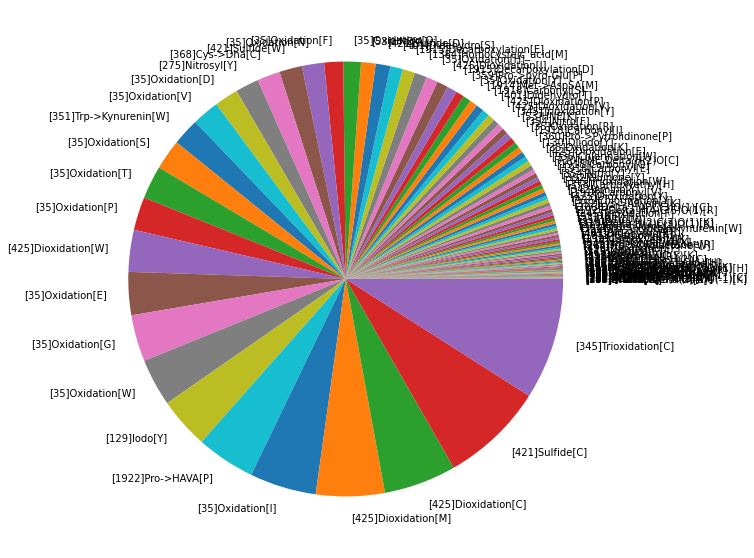

In [37]:
fig = plt.figure()
plt.pie(x = modcounts_no_mox["scan"],labels=modcounts_no_mox["Modification"])
fig.set_figheight(10)
fig.set_figwidth(10)

In [38]:
modcounts['Modified residue'] = modcounts['Modification'].str[-2]

array(['[340]Bromo[W]', '[130]Diiodo[H]',
       '[743]4-ONE+Delta:H(-2)O(-1)[K]', '[335]HNE+Delta:H(2)[K]',
       '[1923]Delta:H(-4)O(2)[W]', '[721]4-ONE[K]',
       '[1924]Delta:H(-4)O(3)[W]', '[721]4-ONE[H]', '[340]Bromo[F]',
       '[743]4-ONE+Delta:H(-2)O(-1)[C]', '[721]4-ONE[C]', '[340]Bromo[H]',
       '[937]dichlorination[C]', '[720]HNE-Delta:H(2)O[K]',
       '[720]HNE-Delta:H(2)O[H]', '[206]Delta:H(4)C(3)O(1)[K]',
       '[335]HNE+Delta:H(2)[H]', '[205]Delta:H(6)C(6)O(1)[K]',
       '[206]Delta:H(4)C(3)O(1)[R]', '[1929]Delta:H(6)C(7)O(4)[R]',
       '[425]Dioxidation[K]', '[425]Dioxidation[R]',
       '[743]4-ONE+Delta:H(-2)O(-1)[H]', '[1928]Delta:H(10)C(8)O(1)[K]',
       '[1916]Aspartylurea[H]', '[340]Bromo[Y]',
       '[1917]Formylasparagine[H]', '[392]Quinone[W]',
       '[206]Delta:H(4)C(3)O(1)[H]', '[860]G-H1[R]',
       '[335]HNE+Delta:H(2)[C]', '[53]HNE[C]', '[1918]Carbonyl[R]',
       '[318]Delta:H(2)C(5)[K]', '[35]Oxidation[C]', '[275]Nitrosyl[C]',
       '[129]Iod

In [39]:
modified_AA_counts = modcounts.groupby("Modified residue").sum().reset_index()
modified_AA_counts

,Modified residue,scan
0,A,282
1,C,5668
2,D,819
3,E,1093
4,F,508
5,G,790
6,H,433
7,I,1419
8,K,444
9,M,113990


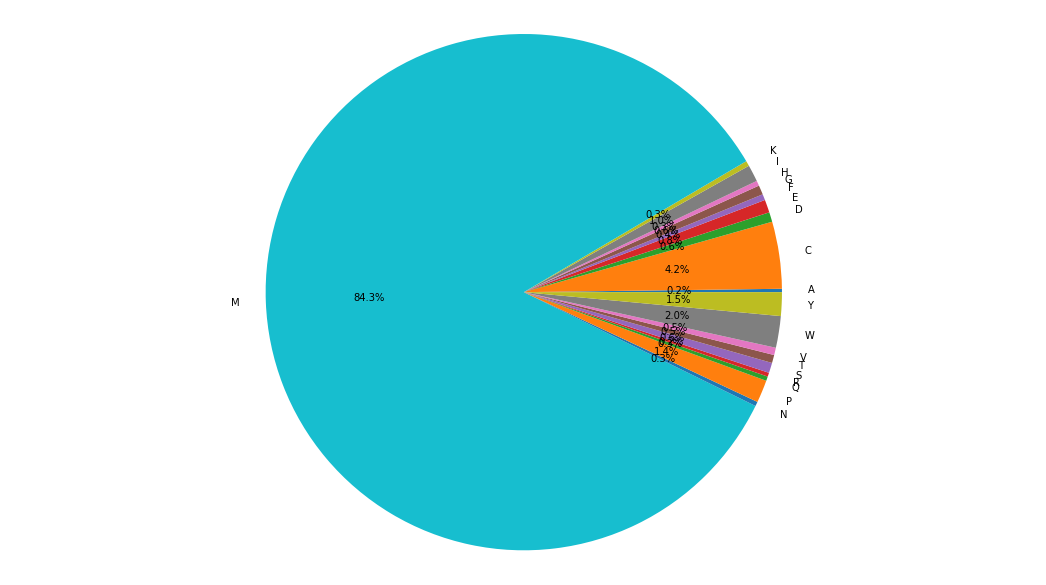

In [40]:
fig1, ax1 = plt.subplots()
ax1.pie(modified_AA_counts['scan'], labels = modified_AA_counts['Modified residue'], autopct='%1.1f%%')
ax1.axis('equal')
fig1.set_size_inches(18.5, 10.5)
fig1.show()

In [41]:
modcounts_no_mox['Amino acid modified'] = modcounts_no_mox['Modification'].str[-2]
modcounts_no_mox

/tmp/ipykernel_2223886/3104114616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modcounts_no_mox['Amino acid modified'] = modcounts_no_mox['Modification'].str[-2]


,Modification,scan,Amino acid modified
40,[340]Bromo[W],1,W
2,[130]Diiodo[H],1,H
109,[743]4-ONE+Delta:H(-2)O(-1)[K],2,K
37,[335]HNE+Delta:H(2)[K],3,K
18,[1923]Delta:H(-4)O(2)[W],3,W
...,...,...,...
61,[35]Oxidation[I],1127,I
91,[425]Dioxidation[M],1164,M
86,[425]Dioxidation[C],1226,C
83,[421]Sulfide[C],1754,C


In [42]:
modified_AA_counts_noM = modcounts_no_mox.groupby(['Amino acid modified']).sum().reset_index()
modified_AA_counts_noM

,Amino acid modified,scan
0,A,282
1,C,5668
2,D,819
3,E,1093
4,F,508
5,G,790
6,H,433
7,I,1419
8,K,444
9,M,1506


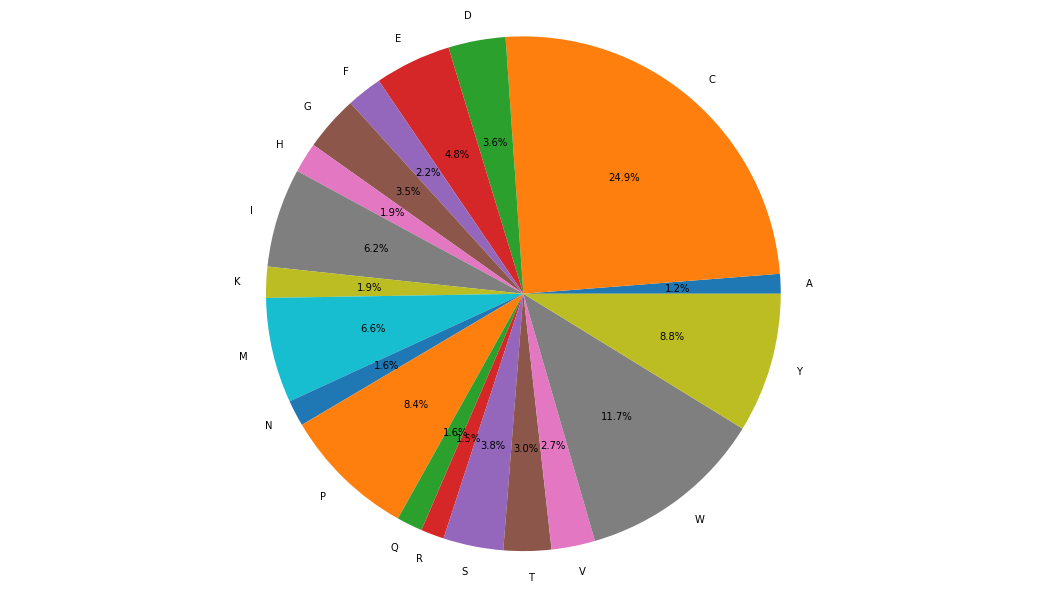

In [43]:
fig1, ax1 = plt.subplots()
ax1.pie(modified_AA_counts_noM['scan'], labels = modified_AA_counts_noM['Amino acid modified'], autopct='%1.1f%%')
ax1.axis('equal')
fig1.set_size_inches(18.5, 10.5)
fig1.show()

Doe hier nog iets met mass shifts a la vorige analyse

Goal: to see which oxidized peptidoforms return among different treatments

In [44]:
#Write peptidoform names in column
import re
def peptidoform_name(row):
    matched_peptide = row["matched_peptide"]
    def splitatn(strng, sep, pos):
        strng = strng.split(sep)
        return sep.join(strng[:pos]), sep.join(strng[pos:])

    if row["modifications"] == "None":
        return matched_peptide
    else:
        modifications = splitatn(row["modifications"],"|",2)
        modifications = [i for i in modifications if i]

    
    poslist = []
    modlist = []
    for mod in modifications:
        pos = mod.split("|")[0]
        if pos != "x":
            poslist.append(int(pos)-1)
        modi = mod.split("|")[1]
        pattern = re.compile(pattern= r"\[\D\]")
        modif = re.sub(pattern, "", modi)
        modlist.append(modif)

    moddict ={poslist[i]: modlist[i] for i in range(len(poslist))}
    peptidoform_list = []
    for i, aa in enumerate(matched_peptide):
        if i in moddict:
            peptidoform_list.append(aa)
            peptidoform_list.append(moddict[i])
        else:
            peptidoform_list.append(aa)
    
    peptidoform = "".join(peptidoform_list)
    return peptidoform



    

In [45]:
oxPSMs['Peptidoform_name'] = oxPSMs.apply(lambda row: peptidoform_name(row), axis=1)

/tmp/ipykernel_2223886/3443998387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oxPSMs['Peptidoform_name'] = oxPSMs.apply(lambda row: peptidoform_name(row), axis=1)


In [46]:
os.chdir("/home/robbe/ionbot/peptidoforms_per_cond")

In [47]:
#Write a csv file with al peptidoform names found per treatment
for i in range(gtreat.shape[0]):
    df = oxPSMs.loc[(oxPSMs["Oxidant treatment"]==gtreat.iloc[i][0]) & (oxPSMs["Oxidant dose (µM)"]==gtreat.iloc[i][1]) & (oxPSMs["Length of oxidant treatment (mins)"]==gtreat.iloc[i][2]) & (oxPSMs["Secondary treatment"]==gtreat.iloc[i][3]) & (oxPSMs["Secondary treatment dose (µM)"]==gtreat.iloc[i][4]) & (oxPSMs["Length of Secondary treatment (mins)"]==gtreat.iloc[i][5])]
    peptidoforms = df["Peptidoform_name"]
    peptidoforms.to_csv("Condition{}.csv".format(i))
    